# Uber and lyft price Prediction

- I will analyze to understand the factors affecting the dynamic pricing for Uber and Lyft . Using Machine Learning Algorithms to predict the determining factors that lead to surge pricing.

- The datasets used in this project have been imported from Kaggle with two files.
- The First is **cab_rides** which contains   693071 rows× 8 columns, and the Second is **weather contains** 6276 rows × 8 columns


## import libraies 

In [1117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

## Load the dataset 

In [1118]:
data = pd.read_csv('cab_rides.csv')
data2=pd.read_csv('weather.csv')

In [1119]:
data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [1120]:
data2

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [1121]:
data.info() # Make sure of that column name changed correctly and also datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


- This shows that we have 10 columns in total besides index, and we have 693070 record.
- None of the data fields have NULL values.


In [1122]:
data.columns #show the features in cab_rides dataset

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [1123]:
data.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


## Get statistical data about each numerical column

In [1124]:
data.describe() # Get statistical data about each numerical column

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


- Summarize the statistics description for each numerical columns
- there is no any outlier values.
- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value. 
- the mean of price 16.54

### Cleaning cab_rides Data

-  drop column id , product_id  as it is irrelevant to target variable.

In [1125]:
data=data.drop('id',axis=1)

In [1126]:
data=data.drop('product_id',axis=1)

- Price column has 55095 rows missing data I will fill with median value

In [1127]:

data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
name                    0
dtype: int64

In [1128]:
#missing value

In [1129]:
data['price'].isnull().sum()  # The price column has 55095 rows missing data

55095

In [1130]:
data.price.median()

13.5

In [1131]:
# fill the null values with median
data['price'].fillna(data.price.median(),inplace=True)


In [1132]:
data.isnull().sum() # show if there any null value

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64

### The second dataset weather

In [1133]:
data2

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [1134]:
data2.info(); # Make sure of that column name changed correctly and also datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


- This shows that we have 10 columns in total besides index, and we have 693070 record.
- None of the data fields have NULL values.


In [1135]:
data2.describe() # Get statistical data about each numerical column

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


## Cleaning weather Data

In [1136]:
data2.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

- There is null values in rain , replace them with 0 as there was no rain.

In [1137]:
data2.rain.fillna(0, inplace=True) # replace null rain with  with 0 

## Merge the weather data with the cab_rides data

- I will merge the data with combined column (Time stamp)

In [1138]:
data["time_stamp"] = data["time_stamp"] / 1000
data["time_stamp"] = data["time_stamp"].apply(np.floor)

In [1139]:
data["time_stamp"] = data["time_stamp"].astype(int)
data2.columns = ['temp', 'source', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind']

In [1140]:
merged_data = pd.merge(data, data2, on=[ "time_stamp"])
merged_data

,distance,cab_type,time_stamp,destination,source_x,price,surge_multiplier,name,temp,source_y,clouds,pressure,rain,humidity,wind
0,1.08,Lyft,1543208580,Northeastern University,Back Bay,10.5,1.0,Lyft XL,40.67,Haymarket Square,0.94,1013.75,0.0,0.92,2.98
1,1.08,Lyft,1543208580,Northeastern University,Back Bay,10.5,1.0,Lyft XL,40.52,Northeastern University,0.93,1013.73,0.0,0.92,3.05
2,1.08,Lyft,1543208580,Northeastern University,Back Bay,10.5,1.0,Lyft XL,40.58,West End,0.94,1013.75,0.0,0.92,2.94
3,2.48,Uber,1543208580,South Station,Beacon Hill,21.5,1.0,Black,40.67,Haymarket Square,0.94,1013.75,0.0,0.92,2.98
4,2.48,Uber,1543208580,South Station,Beacon Hill,21.5,1.0,Black,40.52,Northeastern University,0.93,1013.73,0.0,0.92,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46473,0.64,Lyft,1543213743,West End,Haymarket Square,16.5,1.0,Lux Black,43.97,Financial District,1.00,1014.18,0.0,0.81,1.45
46474,0.64,Lyft,1543213743,West End,Haymarket Square,16.5,1.0,Lux Black,40.60,Haymarket Square,1.00,1014.18,0.0,0.92,1.43
46475,0.64,Lyft,1543213743,West End,Haymarket Square,16.5,1.0,Lux Black,40.39,Northeastern University,1.00,1014.16,0.0,0.92,1.33
46476,0.64,Lyft,1543213743,West End,Haymarket Square,16.5,1.0,Lux Black,40.46,Theatre District,1.00,1014.17,0.0,0.92,1.41


## Feature Engenering

- I need to convert time_stamp to  the readable form. 
Convert it to date, week day, hour and time of day.
calculate time of day into: Morning, Afternoon, Evening and Nigh

In [1141]:
merged_data["date"] = merged_data["time_stamp"].apply(lambda x : datetime.fromtimestamp(x).date())
merged_data["time"] = merged_data["time_stamp"].apply(lambda x: datetime.fromtimestamp(x).time())
merged_data['weekday'] = merged_data['date'].apply(lambda x: x.weekday())
merged_data["weekday"] = merged_data["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
merged_data['hour'] = merged_data['time'].apply(lambda time: time.hour)

merged_data.loc[(merged_data.hour >= 6) & (merged_data.hour < 12) , 'time_of_day'] = 'Morning'
merged_data.loc[(merged_data.hour >= 12) & (merged_data.hour < 15) , 'time_of_day'] = 'Afternoon'
merged_data.loc[(merged_data.hour >= 15) & (merged_data.hour < 18) , 'time_of_day'] = 'Evening'
merged_data.loc[(merged_data.hour >= 18) | (merged_data.hour < 6) , 'time_of_day'] = 'Night'

merged_data = merged_data[['distance', 'cab_type', 'destination', 'source_x', 'price',
       'surge_multiplier', 'name','time_stamp', 'date', 'time', 'weekday', 'hour', 'time_of_day','temp',  'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind']]


In [1142]:
merged_data.head()

,distance,cab_type,destination,source_x,price,surge_multiplier,name,time_stamp,date,time,weekday,hour,time_of_day,temp,clouds,pressure,rain,time_stamp,humidity,wind
0,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,1543208580,2018-11-26,08:03:00,Monday,8,Morning,40.67,0.94,1013.75,0.0,1543208580,0.92,2.98
1,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,1543208580,2018-11-26,08:03:00,Monday,8,Morning,40.52,0.93,1013.73,0.0,1543208580,0.92,3.05
2,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,1543208580,2018-11-26,08:03:00,Monday,8,Morning,40.58,0.94,1013.75,0.0,1543208580,0.92,2.94
3,2.48,Uber,South Station,Beacon Hill,21.5,1.0,Black,1543208580,2018-11-26,08:03:00,Monday,8,Morning,40.67,0.94,1013.75,0.0,1543208580,0.92,2.98
4,2.48,Uber,South Station,Beacon Hill,21.5,1.0,Black,1543208580,2018-11-26,08:03:00,Monday,8,Morning,40.52,0.93,1013.73,0.0,1543208580,0.92,3.05


In [1143]:
merged_data.shape

(46478, 20)

In [1144]:
merged_data.describe()

,distance,price,surge_multiplier,time_stamp,hour,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,46478.000000,46478.000000,46478.000000,4.647800e+04,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,4.647800e+04,46478.000000,46478.000000
mean,2.185357,16.461831,1.017567,1.543392e+09,10.187594,39.109971,0.682439,998.558524,0.017522,1.543392e+09,0.757494,7.934814
std,1.138375,9.266281,0.102235,1.321904e+05,6.690647,3.364203,0.293049,8.575645,0.095414,1.321904e+05,0.104712,3.035841
min,0.020000,2.500000,1.000000,1.543204e+09,0.000000,24.500000,0.000000,990.640000,0.000000,1.543204e+09,0.450000,0.290000
25%,1.270000,9.500000,1.000000,1.543366e+09,4.000000,37.590000,0.460000,991.710000,0.000000,1.543366e+09,0.660000,6.420000
50%,2.170000,13.500000,1.000000,1.543414e+09,10.000000,39.210000,0.750000,995.860000,0.000000,1.543414e+09,0.720000,9.340000
75%,2.930000,22.500000,1.000000,1.543449e+09,16.000000,41.100000,0.970000,1004.150000,0.000000,1.543449e+09,0.840000,10.020000
max,7.460000,92.000000,2.500000,1.545101e+09,23.000000,54.620000,1.000000,1035.030000,0.780700,1.545101e+09,0.990000,13.660000


# Exploratory Data Analysis


## Data Visualization

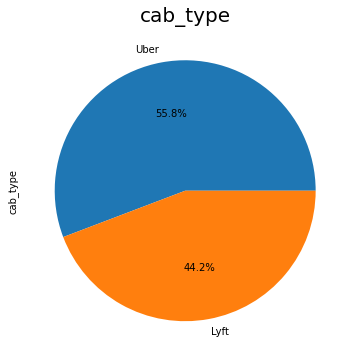

In [1145]:
plt.figure(figsize=(6,6))

plt.title('cab_type',fontsize = 20)
merged_data['cab_type'].value_counts().plot.pie(autopct="%1.1f%%");

- Uber gets a more rides compared to Lyft in this dataset
- Percentage of rides in uber 55.8% 
- Percentage of rides in Lyft 44.2% 

In [1146]:
merged_data['cab_type'].value_counts()

Uber    25925
Lyft    20553
Name: cab_type, dtype: int64

### surge multiplier

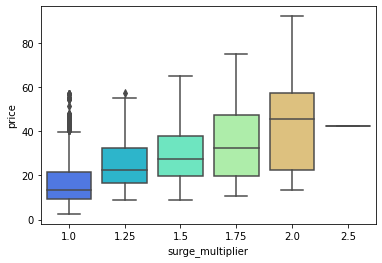

In [1147]:
sns.boxplot(x='surge_multiplier',y='price',data=merged_data,palette='rainbow');

- From above we show the relationship between surge and price .
- The range of 1.0 surge from 10 to 20 dollar 
- The 2.0 surge price  from 25 to 85 dollar and median of raide over 40 
- The surge 2.5 have less count

### Cab_type - Distance Vs Price

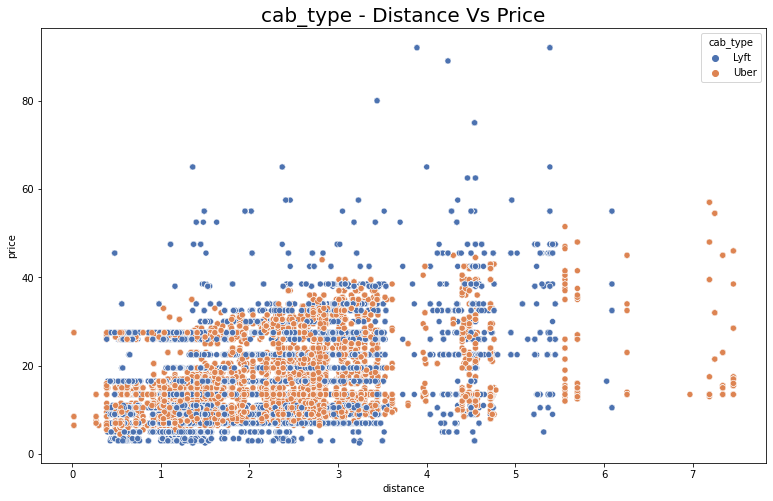

In [1148]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=merged_data, x="distance", y="price", hue="cab_type", palette="deep").set_title("cab_type - Distance Vs Price",fontsize = 20);

- it can be observed that Lyft has a lower minimum fare compared to Uber, at the same time Lyft has higher maximum fare. Also, Uber travel distances are generally higher than Lyft.


- from above visualization we can
conclude that on 1.0 surge   have less  price trips, and on 2.0 trip  have
most price of trips 

### Surge_multiplier Vs Price

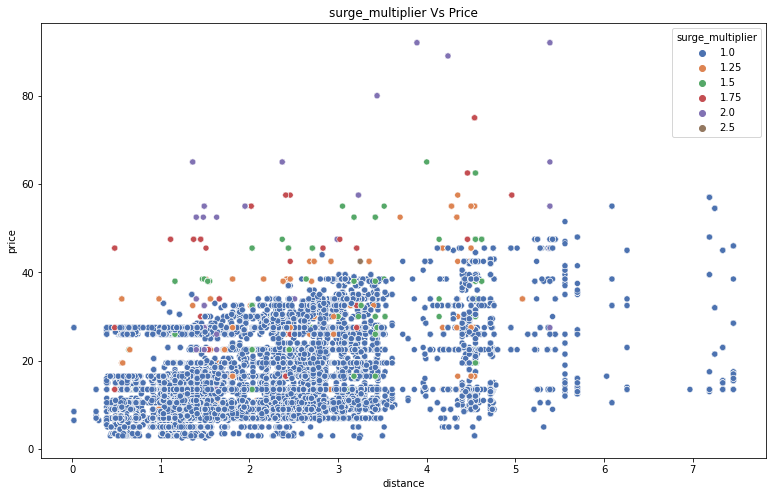

In [1149]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=merged_data, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("surge_multiplier Vs Price");

- from above we learn that distance and price are not strongly correlated. As the distance increases, price does not increase linearly.

- So as the distance increases, price increases. We also see that with higher prices, more surge multiplier increases


In [1150]:
merged_data.groupby('cab_type').count()

,distance,destination,source_x,price,surge_multiplier,name,time_stamp,date,time,weekday,hour,time_of_day,temp,clouds,pressure,rain,time_stamp,humidity,wind
cab_type,,,,,,,,,,,,,,,,,,,
Lyft,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553,20553
Uber,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925,25925


## Rain Vs Price

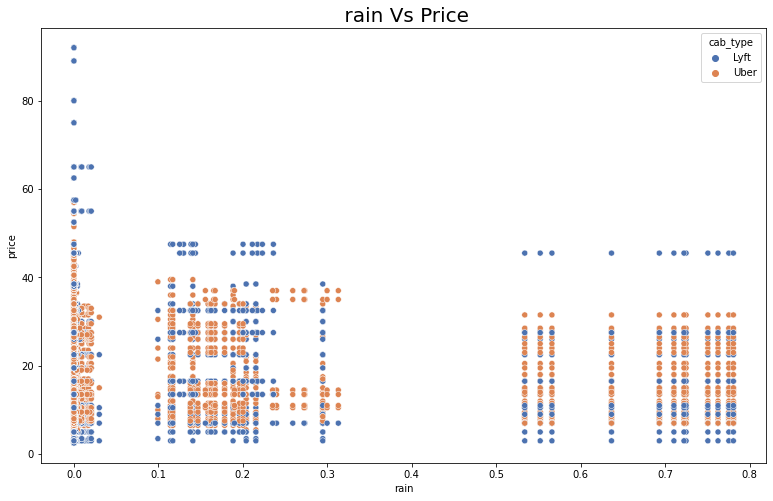

In [1151]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=merged_data, x="rain", y="price", hue="cab_type", palette="deep").set_title(" rain Vs Price",fontsize = 20);

- From above we learn that uber have more rides than lyft in rain time
- lyft higher price than uber  
- The number of rides decreases when it rains. 

In [1153]:
mx=merged_data.groupby(["rain"]).count() # show the count of rain
mx

,distance,cab_type,destination,source_x,price,surge_multiplier,name,time_stamp,date,time,weekday,hour,time_of_day,temp,clouds,pressure,time_stamp,humidity,wind
rain,,,,,,,,,,,,,,,,,,,
0.0000,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964,41964
0.0006,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
0.0007,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
0.0008,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
0.0013,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.7247,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
0.7505,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
0.7625,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69


## Count of Ride  Day  

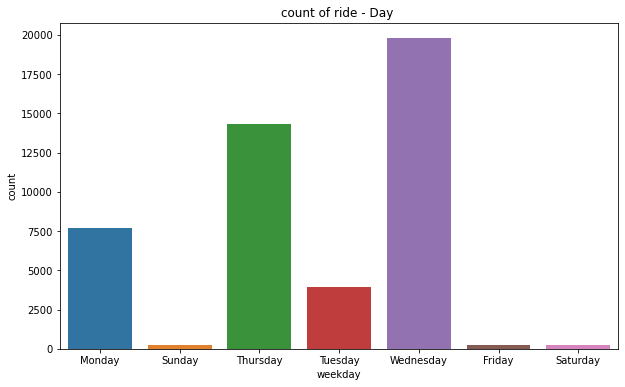

In [1154]:
plt.figure(figsize=(10, 6))
sns.countplot(x="weekday", data=merged_data).set_title("count of ride - Day ");

- From above we can conclude that on sunday  have less trips, and on  wednesday have most trips followed by Thursday, Monday, Tuesday, Saturday, and Friday.

## Count of Ride  Time of day

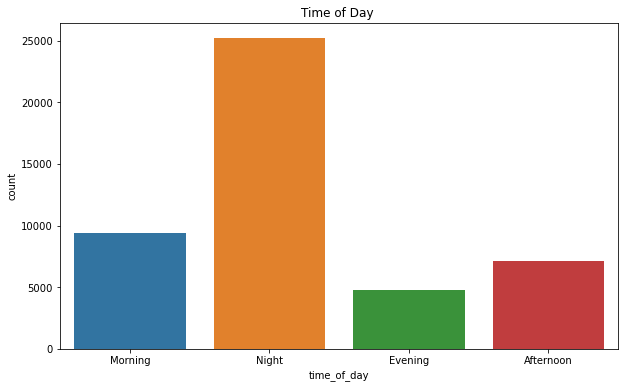

In [1155]:
plt.figure(figsize=(10, 6))
sns.countplot(x="time_of_day", data=merged_data).set_title("Time of Day ");

- most of rides timing happens the most during night time.

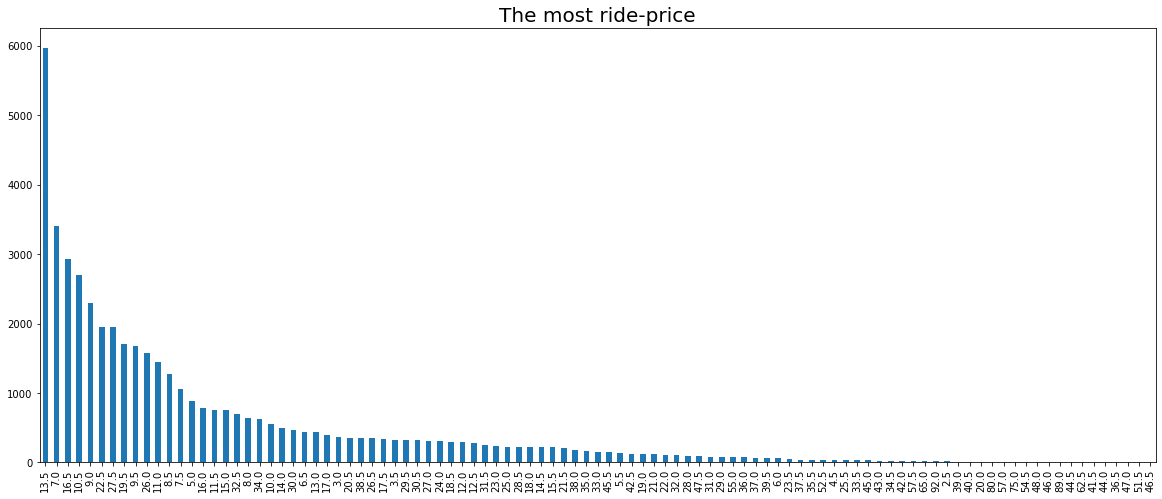

In [1157]:
plt.figure(figsize=(20,8))
plt.title('The most ride-price',fontsize = 20)
merged_data['price'].value_counts().plot(kind='bar');


- The most rides  was  at 13.5 dollar

# Modeling the dataset

##  Features Correlation  

- Used to describe  how data sets related to each another
- Prositive or negative correlation 
- Strong correlation 0.6 - 1
- Moderate correlation0.6 - 0.3 
- weak correlation 0.3 - 0.1
- No correlation   less than 0.1- 0


In [1158]:
merged_data.corr()

,distance,price,surge_multiplier,time_stamp,hour,temp,clouds,pressure,rain,time_stamp,humidity,wind
distance,1.000000,0.350735,0.059049,0.025462,-0.011944,-0.021419,-0.017395,-0.012008,-0.021597,0.025462,-0.015284,0.011962
price,0.350735,1.000000,0.301803,0.012400,0.011756,0.016335,0.017725,0.008833,-0.015292,0.012400,-0.006544,-0.004909
surge_multiplier,0.059049,0.301803,1.000000,0.009324,-0.016252,-0.013516,-0.022673,0.021279,-0.027652,0.009324,0.014342,-0.015495
time_stamp,0.025462,0.012400,0.009324,1.000000,0.004251,-0.268449,-0.269441,-0.344328,-0.147605,1.000000,-0.538368,0.356263
hour,-0.011944,0.011756,-0.016252,0.004251,1.000000,-0.017642,-0.053203,-0.195157,-0.173934,0.004251,-0.119445,-0.192328
temp,-0.021419,0.016335,-0.013516,-0.268449,-0.017642,1.000000,0.714205,0.493710,0.274793,-0.268449,0.069459,0.135158
clouds,-0.017395,0.017725,-0.022673,-0.269441,-0.053203,0.714205,1.000000,0.494288,0.195056,-0.269441,0.121799,-0.022607
pressure,-0.012008,0.008833,0.021279,-0.344328,-0.195157,0.493710,0.494288,1.000000,0.130452,-0.344328,0.648307,-0.526527
rain,-0.021597,-0.015292,-0.027652,-0.147605,-0.173934,0.274793,0.195056,0.130452,1.000000,-0.147605,0.255006,0.256211
time_stamp,0.025462,0.012400,0.009324,1.000000,0.004251,-0.268449,-0.269441,-0.344328,-0.147605,1.000000,-0.538368,0.356263


## 1.Feature selection

In [1159]:
ss=merged_data.corr()['price']
ss

distance            0.350735
price               1.000000
surge_multiplier    0.301803
time_stamp          0.012400
hour                0.011756
temp                0.016335
clouds              0.017725
pressure            0.008833
rain               -0.015292
time_stamp          0.012400
humidity           -0.006544
wind               -0.004909
Name: price, dtype: float64

- Features distance, surge_multiplier are higher moderate positive correlation with price
- Feature price  is the predict target by using Linear Regression

## 2.Training and Testing Data


- Split the dataset into two pieces: a training set and a testing set
- Train the model on the training set.
- Test the model on the testing set

In [1160]:
X=merged_data[['distance','surge_multiplier']] #seleced feature
y=merged_data['price'] #Target feature

In [1161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1162]:
from sklearn.linear_model import LinearRegression

## 3.Training the Model


- Linear Regression

In [1163]:
lm = LinearRegression()
lm

LinearRegression()

In [1164]:
lm.fit(X_train,y_train) # create Linear Regression

LinearRegression()

In [1165]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.68064607 25.33755591]


In [1166]:
lm.intercept_

-15.217738019701748

In [1167]:
lm.score(X_train,y_train) #show the train score

0.20180843732739118

In [1168]:
predictions = lm.predict( X_test) # predicting test data

Text(0, 0.5, 'Predicted Y')

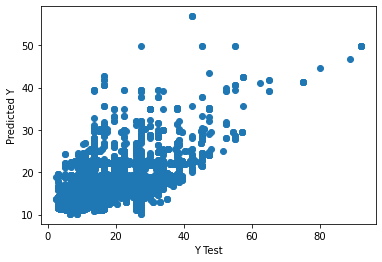

In [1169]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [1170]:
#sns.lmplot(x='price',y='distance',data=merged_data)

### Evaluating the Model

In [1171]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions) #show the test score

0.20328585604895677

##  4.Residuals


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


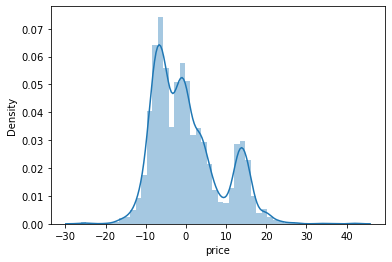

In [1173]:
sns.distplot((y_test-predictions),bins=50);

# Conclusion


In [1174]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
distance,2.680646
surge_multiplier,25.337556


In [1175]:
df=pd.DataFrame({'Actual': y_test,'predicted':predictions})
df

,Actual,predicted
41818,19.5,14.730529
14830,13.5,14.140787
13359,16.5,17.786466
744,27.5,13.095335
20642,19.5,18.000917
...,...,...
18843,14.0,14.301626
2068,10.5,11.620980
33782,10.5,12.773657
830,26.0,14.810949


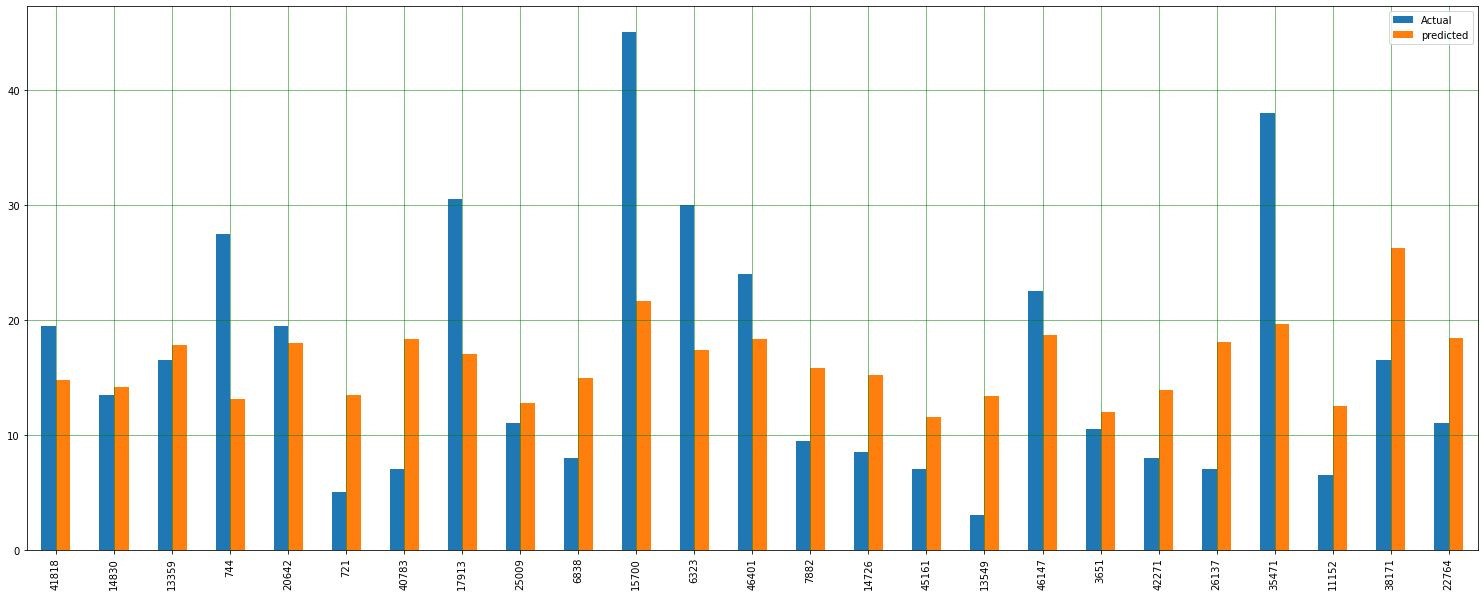

In [1176]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Conclusion
- The model work very well but is not the best. There is a convergence between reality and prediction
- People avoid taking rides when it rains.

- When traveling long distances, the price does not increase linearly. However, based on the time and demand, a surge can affect the cost.

- Uber can be the first choice for long distances.